# How lucky and unlucky numbers can play a vital role in determining your property values 

Numerical superstitious beliefs are wide spread in Asian countries and have a powerful impact in decision-making, from choosing a license plate or mobile number to making momentous decisions, such as buying a house. People who have been immersed in Asian culture tend to believe that things associated with the "lucky numbers" can also bring them good luck.

For example eight is considered the luckiest number because it sounds like "wealth" in Chinese. Four, on the other side, is often deemed as an inauspicious number because it sounds like the Chinese word for death. 

With the surge of Chinese buyers in the U.S. housing market, properties related to auspicious numbers might be more appealing to buyers, and vice versa. I want to examine the U.S. housing data to see whether the street number or the apartment number could affect the property values. My hypothesis is that in markets with more ethnic Chinese and Taiwanese buyers, average price of houses with street addresses ending or starting with the unlucky number four will be lower while that with the lucky number eight will be higher.

data source: https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

I decided to focus on New York in my initial analysis. 

New York is an ideal setting for this project because it has been destinations for Chinese immigrants since the 1830s and home to the largest ethnic Chinese population in the United States. 

I analyzed housing data between 2012 and 2019 from NYC department of Finance. 

In [229]:
# load in housing data from 2011 to 2019
years = ["2012", "2013", "2014", "2016", "2017", "2018", "2019"]

si = pd.read_excel("nyc-gov-rolling-sales-data/2015_statenisland.xls", header=4)
bx = pd.read_excel("nyc-gov-rolling-sales-data/2015_bronx.xls", header=4)
bk = pd.read_excel("nyc-gov-rolling-sales-data/2015_brooklyn.xls", header=4)
mt = pd.read_excel("nyc-gov-rolling-sales-data/2015_manhattan.xls", header=4)
qn = pd.read_excel("nyc-gov-rolling-sales-data/2015_queens.xls", header=4)
df_o = pd.concat([si, bx, bk, mt, qn]).reset_index(drop=True)
    
for i in years:
    if i == "2018" or i == "2019": 
        si = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_statenisland.xlsx", header=4)
        bx = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_bronx.xlsx", header=4)
        bk = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_brooklyn.xlsx", header=4)
        mt = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_manhattan.xlsx", header=4)
        qn = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_queens.xlsx", header=4)
    else: 
        si = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_statenisland.xls", header=4)
        bx = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_bronx.xls", header=4)
        bk = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_brooklyn.xls", header=4)
        mt = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_manhattan.xls", header=4)
        qn = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_queens.xls", header=4)

    df_o = pd.concat([df_o, si, bx, bk, mt, qn]).reset_index(drop=True)

In [230]:
df_o.columns = [i.replace('\n', '') for i in df_o.columns]

In [231]:
df_o.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,TAX CLASS AS OF FINAL ROLL 17/18,BUILDING CLASS AS OF FINAL ROLL 17/18,TAX CLASS AS OF FINAL ROLL 18/19,BUILDING CLASS AS OF FINAL ROLL 18/19
0,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5394.0,4.0,,A2,26 FINGAL STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5397.0,51.0,,A1,23 EYLANDT STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5401.0,5.0,,A2,28 JANSEN STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5402.0,43.0,,A1,295 HAROLD AVENUE,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404.0,46.0,,A1,119 LENZIE STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [232]:
print("Number of records: " + str(df_o.shape))

Number of records: (773881, 46)


In [361]:
df = df_o.copy()

In [362]:
df = df.loc[:, ~df.columns.duplicated()]

In [363]:
df["BUILDING CLASS CATEGORY"].unique()

array(['01  ONE FAMILY DWELLINGS                    ',
       '02  TWO FAMILY DWELLINGS                    ',
       '05  TAX CLASS 1 VACANT LAND                 ',
       '06  TAX CLASS 1 - OTHER                     ',
       '21  OFFICE BUILDINGS                        ',
       '36  OUTDOOR RECREATIONAL FACILITIES         ',
       '04  TAX CLASS 1 CONDOS                      ',
       '03  THREE FAMILY DWELLINGS                  ',
       '07  RENTALS - WALKUP APARTMENTS             ',
       '31  COMMERCIAL VACANT LAND                  ',
       '32  HOSPITAL AND HEALTH FACILITIES          ',
       '10  COOPS - ELEVATOR APARTMENTS             ',
       '13  CONDOS - ELEVATOR APARTMENTS            ',
       '29  COMMERCIAL GARAGES                      ',
       '39  TRANSPORTATION FACILITIES               ',
       '41  TAX CLASS 4 - OTHER                     ',
       '22  STORE BUILDINGS                         ',
       '14  RENTALS - 4-10 UNIT                     ',
       '27

In this analysis, we're only inspecting records of single family houses.

In [364]:
df = df[(df["BUILDING CLASS CATEGORY"] == "01  ONE FAMILY DWELLINGS                    ") 
        | (df["BUILDING CLASS CATEGORY"] == "01 ONE FAMILY DWELLINGS                    ")
       |  (df["BUILDING CLASS CATEGORY"] == "01 ONE FAMILY DWELLINGS")
       |(df["BUILDING CLASS CATEGORY"] == "01  ONE FAMILY HOMES                        ")]

In [365]:
print("Number of records: " + str(df.shape))

Number of records: (141123, 25)


### Data Examination

In [366]:
print("There are "+ str(len(df.columns)) +" columns in the dataset.")

There are 25 columns in the dataset.


In [367]:
# inspect null values
df.isnull().sum()

BOROUGH                                       0
NEIGHBORHOOD                                  0
BUILDING CLASS CATEGORY                       0
TAX CLASS AT PRESENT                      57983
BLOCK                                         0
LOT                                           0
EASE-MENT                                 38255
BUILDING CLASS AT PRESENT                 57983
ADDRESS                                       0
APARTMENT NUMBER                          38239
ZIP CODE                                      0
RESIDENTIAL UNITS                           149
COMMERCIAL UNITS                            149
TOTAL UNITS                                 149
LAND SQUARE FEET                            149
GROSS SQUARE FEET                           149
YEAR BUILT                                   10
TAX CLASS AT TIME OF SALE                     0
BUILDING CLASS AT TIME OF SALE                0
SALE PRICE                                    0
SALE DATE                               

In [368]:
# inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141123 entries, 0 to 773546
Data columns (total 25 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   BOROUGH                                141123 non-null  float64       
 1   NEIGHBORHOOD                           141123 non-null  object        
 2   BUILDING CLASS CATEGORY                141123 non-null  object        
 3   TAX CLASS AT PRESENT                   83140 non-null   object        
 4   BLOCK                                  141123 non-null  float64       
 5   LOT                                    141123 non-null  float64       
 6   EASE-MENT                              102868 non-null  object        
 7   BUILDING CLASS AT PRESENT              83140 non-null   object        
 8   ADDRESS                                141123 non-null  object        
 9   APARTMENT NUMBER                       102884 no

In [369]:
df = df.dropna(subset=['GROSS SQUARE FEET'])

I made all neighborhood names lower case and stripped extra white space.

In [370]:
df["NEIGHBORHOOD"] = df["NEIGHBORHOOD"].apply(lambda x: x.lower())
df["NEIGHBORHOOD"] = df["NEIGHBORHOOD"].apply(lambda x: x.rstrip(' '))

Remove outliers:

In [371]:
def rmOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    df_out = df[~((df[[column]] < (Q1 - 1.5 * IQR)) |(df[[column]] > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(df_out.shape)
    return df_out

In [372]:
df = rmOutliers(df, "SALE PRICE")
df = rmOutliers(df, "GROSS SQUARE FEET")

575000.0
(137250, 25)
636.0
(129539, 25)


In [373]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,129539.000000,129539.000000,129539.000000,129539.000000,129539.000000,129539.000000,129539.000000,129539.000000,129539.000000,129539.000000,129539.0,1.295390e+05
mean,3.933302,6535.170914,69.473425,11015.412779,1.002771,0.018435,1.021013,3143.461699,1493.027984,1942.880800,1.0,3.440311e+05
std,0.851509,3744.313532,134.067439,497.413550,0.165545,0.138030,0.214837,1905.285921,437.157624,45.798284,0.0,3.117632e+05
min,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,1.000000,200.000000,240.000000,0.000000,1.0,0.000000e+00
25%,3.000000,3814.000000,21.000000,10314.000000,1.000000,0.000000,1.000000,2000.000000,1188.000000,1925.000000,1.0,0.000000e+00
50%,4.000000,6019.000000,41.000000,11234.000000,1.000000,0.000000,1.000000,2600.000000,1411.000000,1940.000000,1.0,3.551000e+05
75%,5.000000,8885.000000,69.000000,11412.000000,1.000000,0.000000,1.000000,4000.000000,1760.000000,1955.000000,1.0,5.500000e+05
max,5.000000,16323.000000,4105.000000,11694.000000,57.000000,2.000000,57.000000,163800.000000,2784.000000,2019.000000,1.0,1.435000e+06


To lesson impacts by other factors, I decided to focus on houses between 2,000 sqft and 1,000.

In [374]:
df = df[(df["GROSS SQUARE FEET"] <= 2000) & (df["GROSS SQUARE FEET"] >= 1000)]

In [375]:
df.shape

(98771, 25)

The top neighborhoods that have the most postings:

In [376]:
df.NEIGHBORHOOD.value_counts()

flushing-north           4391
queens village           2949
st. albans               2898
great kills              2777
bayside                  2546
                         ... 
soho                        1
prospect heights            1
southbridge                 1
downtown-fulton ferry       1
alphabet city               1
Name: NEIGHBORHOOD, Length: 221, dtype: int64

In [377]:
print("Mean price of houses: " + str(df["SALE PRICE"].mean()))

Mean price of houses: 342423.32966154034


<!-- Average Price and size are a lot higher than median rent and size, indicating that these columns have some outliers. -->

### Areas with large Chinese-American populations

The three largest Chinatowns in NYC lie in Brooklyn, Manhattan and Queens. To examine whether houses related to auspicious and inauspicious numbers have higher or lower property values, I wanted to pay close attention to areas with significant Chinese-American populations.

I downloaded the demographic dataset from NYC department of city planning.

In [378]:
# data source: https://www1.nyc.gov/site/planning/planning-level/nyc-population/american-community-survey.page
nydemo = pd.read_csv("nyneighborhood-demo.csv")

In [379]:
nydemo.head()

,GeogName,Borough,AsnChiNoTE,AsnChiNoTM,AsnChiNoTC,AsnChiNoTP,AsnChiNoTZ
0,Allerton-Pelham Gardens,Bronx,444,230,31.5,13.8,6.7
1,Bedford Park-Fordham North,Bronx,157,123,47.6,6.8,5.1
2,Belmont,Bronx,97,62,38.8,14.3,7.9
3,Bronxdale,Bronx,128,107,50.8,10.5,8.2
4,Claremont-Bathgate,Bronx,0,NaN,NaN,NaN,NaN


In [380]:
# lowercase
nydemo["GeogName"] = nydemo["GeogName"].apply(lambda x: x.lower())

In [381]:
# I focus on the column indicating percentage of Chinese population
sortedNydemo = nydemo.sort_values(by=["AsnChiNoTP"], ascending=False).reset_index(drop=True)

In [382]:
sortedNydemo = sortedNydemo[["GeogName", "Borough", "AsnChiNoTP"]]

Before merging the two datasets together, I have to align the naming of the neighborhoods.

In [383]:
for i in df.NEIGHBORHOOD.unique():
    if i.split()[:3] == "upper east side":
        df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, "upper east side")
    elif i.split()[:3] == "upper west side":
        df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, "upper west side")
    elif i == "flatiron":
        df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, 'hudson yards-chelsea-flat iron-union square')
    for j in nydemo.GeogName.unique():
        if i in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif j in i:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif i.split()[0] in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif i.split("/")[0] in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif i.split("-")[0] in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)

Neighborhood names that are not included in the demographic dataset from NYC department of city planning.

In [384]:
ls = []
for i in df.NEIGHBORHOOD.unique():
    if i not in nydemo.GeogName.unique():
        ls.append(i)
print(ls)

['bulls head', 'castleton corners', 'clove lakes', 'concord', 'concord-fox hills', 'grant city', 'livingston', 'mariners harbor', 'pleasant plains', 'princes bay', 'richmondtown', 'richmondtown-lighths hill', 'tompkinsville', 'willowbrook', 'navy yard', 'wyckoff heights', 'greenwich village-central', 'greenwich village-west', 'beechhurst', 'neponsit', 'southbridge', 'alphabet city']


Merge the two datasets so we can have percentage of Chinese population in the housing dataset.

In [385]:
merged = pd.merge(df, nydemo,  how='inner', left_on=['NEIGHBORHOOD'], right_on = ['GeogName'])

In [386]:
merged.shape

(93213, 32)

In [387]:
merged.NEIGHBORHOOD.value_counts()

east flushing                        6659
fordham south                        4995
crotona park east                    3889
great kills                          3034
park-cemetery-etc-queens             2949
                                     ... 
fort greene                             3
hunts point                             2
battery park city-lower manhattan       2
upper east side-carnegie hill           1
prospect lefferts gardens-wingate       1
Name: NEIGHBORHOOD, Length: 115, dtype: int64

In [388]:
sortedMerged = merged.sort_values(by = ["AsnChiNoTP"], ascending=False).reset_index(drop=True)

### Find out address ending number

In [389]:
def endingNumAndPrice(df):
    df["addr_number"] = df.ADDRESS.apply(lambda x: x.split(" ")[0])
    
    #Address number that ends with four:
    df["addrnum_end_four"] = df.addr_number.str[-1]=="4"
    
    #Address number that ends without four:
    df["addrnum_end_withoutFour"] = df.addr_number.str[-1]!="4"
    
    #Address number that ends with eight:
    df["addrnum_end_eight"] = df.addr_number.str[-1]=="8"
    
    #Address number that ends without eight:
    df["addrnum_end_withoutEight"] = df.addr_number.str[-1]!="8"
    
    total = df.shape[0]
    aptWithFour = df[df["addrnum_end_four"]==True]
    aptWithEight = df[df["addrnum_end_eight"]==True]
    aptWithoutFour = df[df["addrnum_end_withoutFour"]==True]
    aptWithoutEight = df[df["addrnum_end_withoutEight"]==True]
    wFourP = round(aptWithFour.shape[0] / total, 2)
    wEightP = round(aptWithEight.shape[0] / total, 2)
    withoutFourP = round(aptWithoutFour.shape[0] / total, 2)
    withoutEightP = round(aptWithoutEight.shape[0] / total, 2)
    
    print("Houses with address number that ends with four has " + str(aptWithFour.shape[0]) + " observations, making up " + str(wFourP) + " of the total observations.")
    print("Houses with address number that ends without four has " + str(aptWithoutFour.shape[0]) + " observations, making up " + str(withoutFourP) + " of the total observations.")
    print("Houses with address number that ends with Eight has " + str(aptWithEight.shape[0]) + " observations, making up "+ str(wEightP) + " of the total observations.")
    print("Houses with address number that ends without Eight has " + str(aptWithoutEight.shape[0]) + " observations, making up "+ str(withoutEightP) + " of the total observations.")

    print("Mean price of all apt: "+ str(round(df["SALE PRICE"].mean())))
    print("Mean price of apt address num ending with four: "+ str(round(aptWithFour["SALE PRICE"].mean())))
    print("Mean price of apt address num ending without four: "+ str(round(aptWithoutFour["SALE PRICE"].mean())))
    print("Mean price of apt address num ending with eight: "+ str(round(aptWithEight["SALE PRICE"].mean())))
    print("Mean price of apt address num ending without eight: "+ str(round(aptWithoutEight["SALE PRICE"].mean())))
    return df

In [390]:
sortedMerged = endingNumAndPrice(sortedMerged)

Houses with address number that ends with four has 9558 observations, making up 0.1 of the total observations.
Houses with address number that ends without four has 83655 observations, making up 0.9 of the total observations.
Houses with address number that ends with Eight has 8884 observations, making up 0.1 of the total observations.
Houses with address number that ends without Eight has 84329 observations, making up 0.9 of the total observations.
Mean price of all apt: 343948
Mean price of apt address num ending with four: 340928
Mean price of apt address num ending without four: 344294
Mean price of apt address num ending with eight: 341844
Mean price of apt address num ending without eight: 344170


Drop rows with no address number:

In [391]:
noNan = sortedMerged.dropna(subset=['addr_number'])

Create a function to calculate the ratio between the avg price of houses with address number ending in 4 and that ending without 4.

In [392]:
def comparePrice(df, column, number):
    grouped = df.groupby(["NEIGHBORHOOD", column])
    moreThan10 = grouped.filter(lambda x: x["BOROUGH"].count() >= number) 
    moreThan10Mean = moreThan10.groupby(["NEIGHBORHOOD", column]).mean()
    moreThan10MeanDf = moreThan10Mean.add_suffix('_Mean').reset_index()
    moreThan10MeanDf["ratio"] = moreThan10MeanDf.groupby("NEIGHBORHOOD")["SALE PRICE_Mean"].apply(lambda x: x/x.shift(1))
    moreThan10MeanDfVariance = moreThan10MeanDf[moreThan10MeanDf[column]==True]
    return moreThan10MeanDfVariance

In [393]:
four = comparePrice(noNan, "addrnum_end_four", 10) # select neighborhoods that have at least 10 sales records

Each dot represents one neighborhood. The x axis indicates the percentage of Chinese population and the y axis represents the ratio of dividing the avg price of condos with address number ending in 4 by that of houses with address number ending without 4.

In [394]:
fig = px.scatter(four, x="AsnChiNoTP_Mean", y="ratio", 
                hover_data=['NEIGHBORHOOD'],
                labels={
                     "AsnChiNoTP_Mean": "% of Chinese population by neighborhood",
                     "ratio": "Ratio  by neighborhood",
                 },
                title="Relationship between % of Chinese population and avg price ratio of houses(with and without four)")
fig.show()

We can hardly observe any trends from the above graph. The linear regression line is flat compared to what we have seen in the analysis of condos data, suggesting that avg prices of houses with address number ending in 4 and that without four have little to no difference.

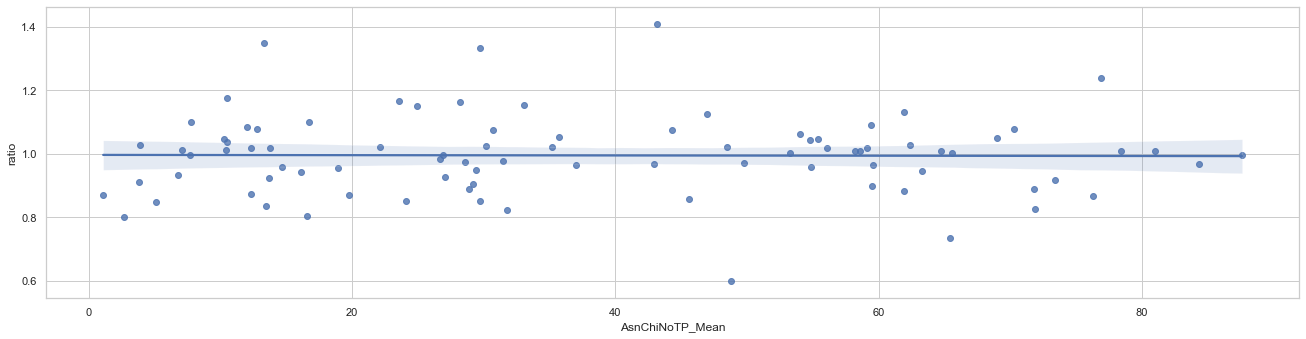

In [395]:
plt.figure(figsize=(20,5))
ax = sns.regplot( x="AsnChiNoTP_Mean", y="ratio", data=four)
# ax.set(ylim=(-0.4, 0.4))

Applying the same function to calculate avg price of houses with addrnumber ending with 8 and that ending without 8.

In [396]:
eight = comparePrice(noNan, "addrnum_end_eight", 10)

In [397]:
fig = px.scatter(eight, x="AsnChiNoTP_Mean", y="ratio", 
                hover_data=['NEIGHBORHOOD'],
         labels={
                     "AsnChiNoTP_Mean": "% of Chinese population by neighborhood",
                     "ratio": "Ratio  by neighborhood",
                 },
                title="Relationship between % of Chinese population and avg price ratio of condos(with and without eight)")
fig.show()

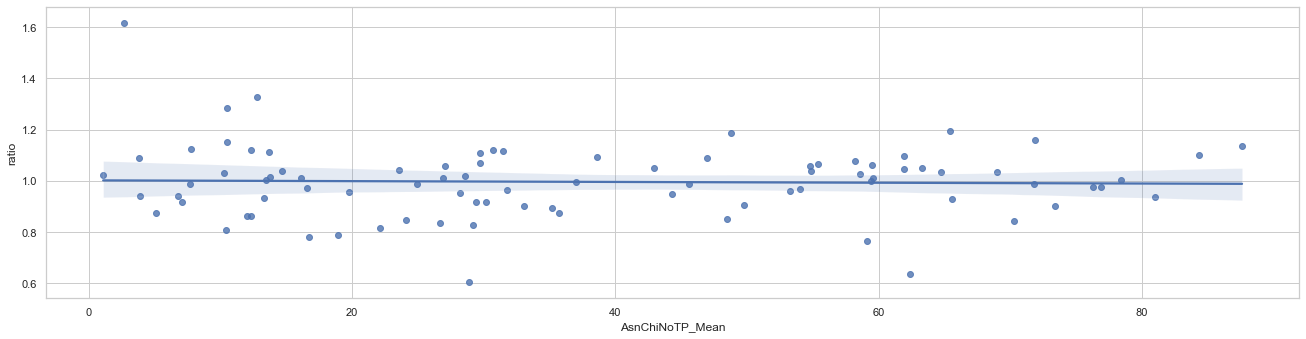

In [398]:
plt.figure(figsize=(20,5))
ax = sns.regplot( x="AsnChiNoTP_Mean", y="ratio", data=eight)
# ax.set(ylim=(-0.4, 0.4))

### Concerns

- Price could be affected by many factors: ex. renovations, views, transportation...

### Next Steps
- Put data point on map, color each data point by median price and observe whether other factors influence property values.
- Build a larger dataset with time seires to examine whether numeric superstitious beliefs have faded away.
- Use census data to supplement the ethnicity information.
- Research numeric superstitious beliefs in other cultures.